<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2024/blob/main/007_depp_learning/%5Bgrupo-a%5DClase29_SIC_AI_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase29: red neuronal convolucional (CNN)

# Redes Neuronales Convolucionales (CNN) y su Relación Biológica

Las **Redes Neuronales Convolucionales (CNN)** son un tipo de red neuronal diseñada específicamente para procesar datos que tienen una estructura de cuadrícula, como las imágenes. Son ampliamente utilizadas en tareas de visión por computadora como la clasificación de imágenes, el reconocimiento de objetos y la segmentación.

## Origen Biológico de las CNN

El diseño de las CNN se inspira en el sistema visual de los animales, particularmente en los descubrimientos realizados por los neurocientíficos **David Hubel** y **Torsten Wiesel**, quienes ganaron el **Premio Nobel** en 1981 por su investigación sobre la corteza visual de los gatos y monos.

### Hallazgos de Hubel y Wiesel:
1. **Detección de Bordes y Características Simples**:
   - Descubrieron que las neuronas en la corteza visual están especializadas para responder a estímulos visuales simples, como **bordes**, **líneas** y **ángulos**, en áreas pequeñas del campo visual. Estas neuronas se conocen como **neuronas simples**.

2. **Organización Jerárquica**:
   - Las neuronas se organizan en capas jerárquicas. Las primeras capas detectan características simples, mientras que las capas superiores combinan esta información para identificar patrones más complejos.

3. **Campos Receptivos**:
   - Cada neurona tiene un **campo receptivo**, es decir, una pequeña región del campo visual a la que responde. De manera similar, en una CNN, los **filtros convolucionales** examinan áreas pequeñas de la imagen y aprenden a detectar características locales.

## Relación entre las CNN y el Sistema Visual

Las CNN están diseñadas para imitar el funcionamiento del sistema visual biológico de los animales. Aquí algunos puntos clave de la relación:

- **Capas Convolucionales**: En las CNN, las capas convolucionales aplican filtros a la imagen para detectar características como bordes, líneas y texturas, de manera similar a cómo las neuronas simples detectan bordes y contornos.
  
- **Campos Receptivos**: Las capas convolucionales analizan pequeñas secciones de la imagen (campos receptivos) de manera análoga a cómo las neuronas en la corteza visual responden a áreas específicas del campo visual.

- **Combinación de Características**: En las CNN, las capas posteriores combinan las características aprendidas por las primeras capas para reconocer patrones más complejos, tal como lo hace el sistema visual en los animales al combinar información para reconocer objetos completos.



Por ejemplo revisemos el siguiente [artículo de Wikipedia](https://es.wikipedia.org/wiki/N%C3%BAcleo_(procesamiento_digital_de_im%C3%A1genes))

| Operación               | Núcleo                                   | Imagen resultante                             |
|-------------------------|------------------------------------------|-----------------------------------------------|
| **Identidad**            | \[ [0, 0, 0], <br> [0, 1, 0], <br> [0, 0, 0] \] | ![Imagen original](https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png) |
| **Detección de bordes**  | \[ [1, 0, -1], <br> [0, 0, 0], <br> [-1, 0, 1] \] | ![Bordes 1](https://upload.wikimedia.org/wikipedia/commons/8/8d/Vd-Edge1.png) |
|                         | \[ [0, 1, 0], <br> [1, -4, 1], <br> [0, 1, 0] \] | ![Bordes 2](https://upload.wikimedia.org/wikipedia/commons/8/83/Vd-Edge2.png) |
|                         | \[ [-1, -1, -1], <br> [-1, 8, -1], <br> [-1, -1, -1] \] | ![Bordes 3](https://upload.wikimedia.org/wikipedia/commons/6/6d/Vd-Edge3.png) |
| **Enfocar**              | \[ [0, -1, 0], <br> [-1, 5, -1], <br> [0, -1, 0] \] | ![Enfocar](https://upload.wikimedia.org/wikipedia/commons/4/4e/Vd-Sharp.png) |
| **Desenfoque de cuadro** | 1/9 * \[ [1, 1, 1], <br> [1, 1, 1], <br> [1, 1, 1] \] | ![Desenfoque 1](https://upload.wikimedia.org/wikipedia/commons/0/04/Vd-Blur2.png) |
| **Desenfoque Gaussiano 3x3** | 1/16 * \[ [1, 2, 1], <br> [2, 4, 2], <br> [1, 2, 1] \] | ![Desenfoque Gaussiano](https://upload.wikimedia.org/wikipedia/commons/2/28/Vd-Blur1.png) |
| **Desenfoque Gaussiano 5x5** | 1/256 * \[ [1, 4, 6, 4, 1], <br> [4, 16, 24, 16, 4], <br> [6, 24, 36, 24, 6], <br> [4, 16, 24, 16, 4], <br> [1, 4, 6, 4, 1] \] | ![Desenfoque 5x5](https://upload.wikimedia.org/wikipedia/commons/0/04/Vd-Blur_Gaussian_5x5.png) |
| **Máscara de desenfoque** | -1/256 * \[ [1, 4, 6, 4, 1], <br> [4, 16, 24, 16, 4], <br> [6, 24, -476, 24, 6], <br> [4, 16, 24, 16, 4], <br> [1, 4, 6, 4, 1] \] | ![Máscara de desenfoque](https://upload.wikimedia.org/wikipedia/commons/e/ef/Vd-Unsharp_5x5.png) |


In [ ]:
!pip install opencv-python

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


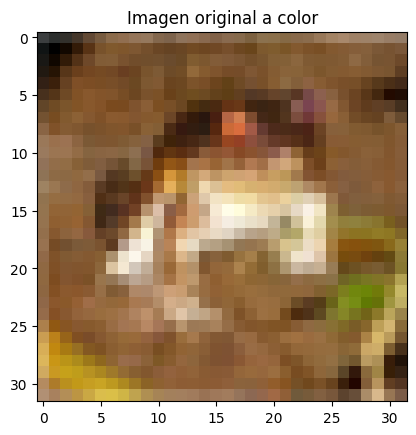

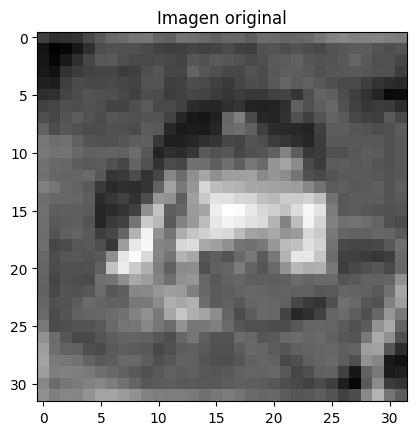

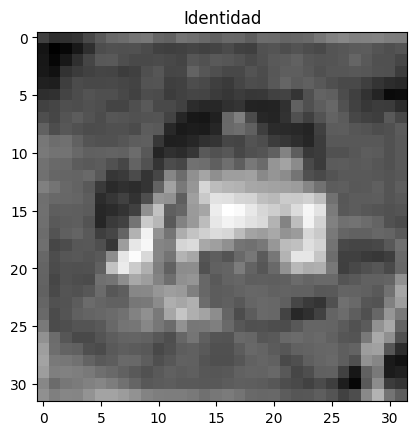

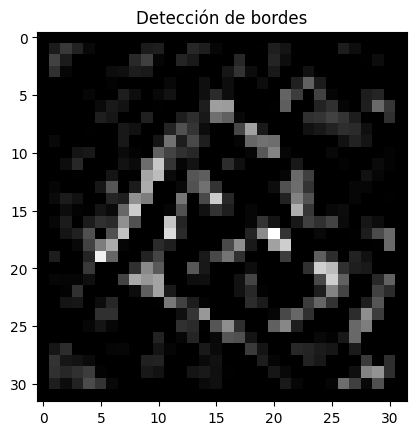

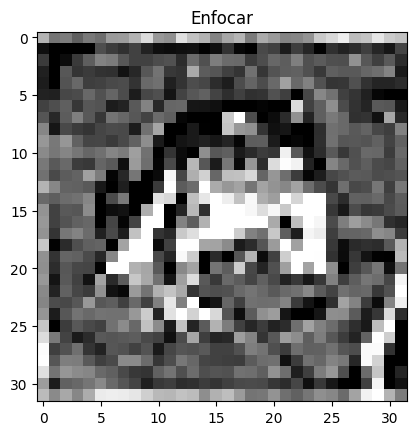

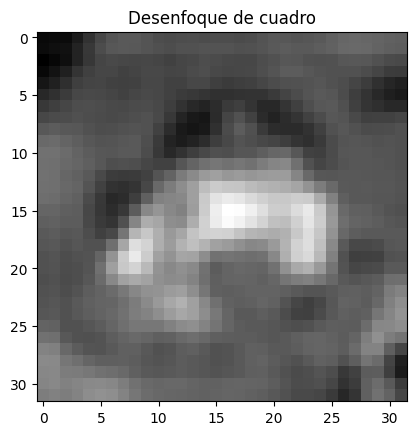

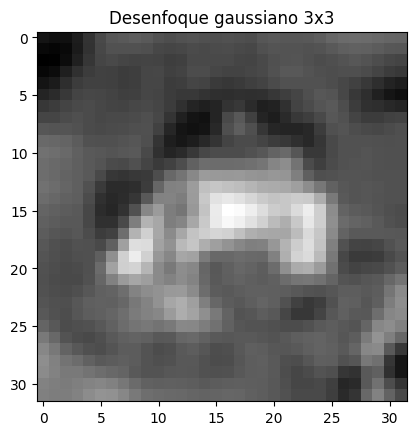

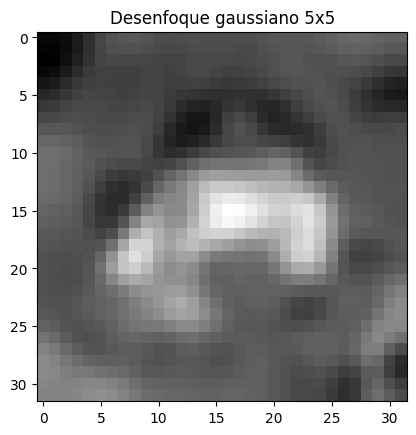

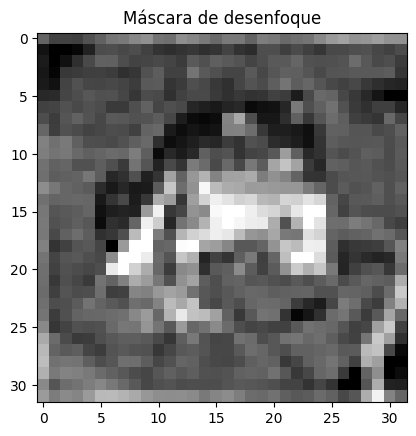

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar cifar10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Seleccionar una imagen de cifar10
image = x_train[0]

# Imprimir imagen original
plt.imshow(image)
plt.title("Imagen original a color")
plt.show()

# Convertir a escala de grises
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mostrar imagen original
plt.imshow(image_gray, cmap='gray')
plt.title("Imagen original")
plt.show()

# Función para aplicar un filtro y mostrar la imagen
def aplicar_filtro(kernel, nombre):
    output = cv2.filter2D(image_gray, -1, kernel)
    plt.imshow(output, cmap='gray')
    plt.title(nombre)
    plt.show()

# Núcleo de identidad
kernel_identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
aplicar_filtro(kernel_identity, "Identidad")

# Núcleo de detección de bordes
kernel_edges = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
aplicar_filtro(kernel_edges, "Detección de bordes")

# Núcleo de enfoque
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
aplicar_filtro(kernel_sharpen, "Enfocar")

# Núcleo de desenfoque
kernel_blur = np.ones((3, 3), np.float32) / 9
aplicar_filtro(kernel_blur, "Desenfoque de cuadro")

# Núcleo de desenfoque gaussiano 3x3
kernel_gaussian_3x3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
aplicar_filtro(kernel_gaussian_3x3, "Desenfoque gaussiano 3x3")

# Núcleo de desenfoque gaussiano 5x5
kernel_gaussian_5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) / 256
aplicar_filtro(kernel_gaussian_5x5, "Desenfoque gaussiano 5x5")

# Núcleo de máscara de desenfoque
kernel_unsharp = -1/256 * np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])
aplicar_filtro(kernel_unsharp, "Máscara de desenfoque")


In [ ]:
# Otro ejemplo
!wget https://github.com/davidlealo/sic_ai_2024/blob/main/007_depp_learning/chapter_8/cat_dog_images/cat-01.jpg

--2024-09-23 19:14:18--  https://github.com/davidlealo/sic_ai_2024/blob/main/007_depp_learning/chapter_8/cat_dog_images/cat-01.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘cat-01.jpg’

cat-01.jpg              [ <=>                ] 169.42K  --.-KB/s    in 0.03s   

2024-09-23 19:14:19 (5.95 MB/s) - ‘cat-01.jpg’ saved [173485]



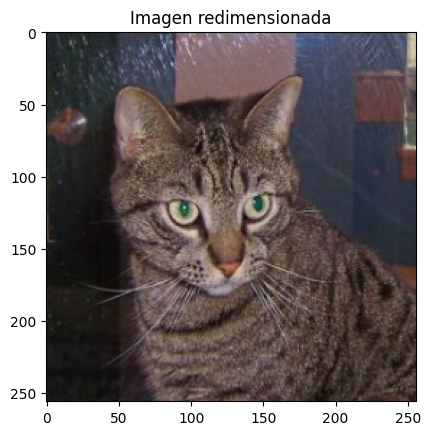

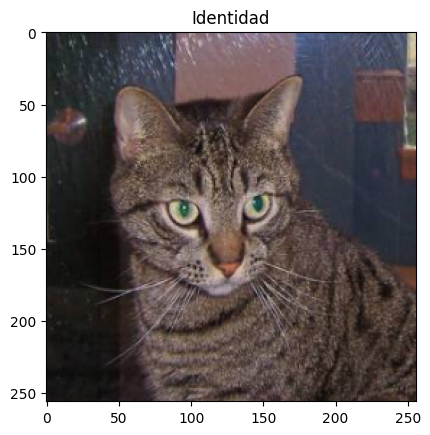

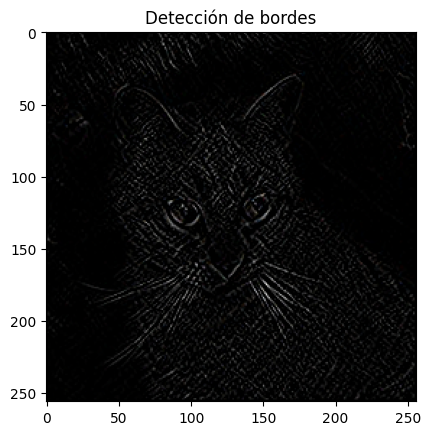

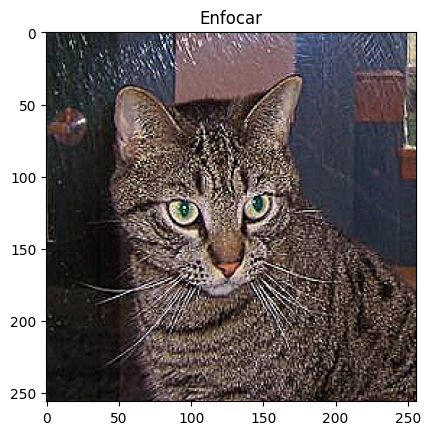

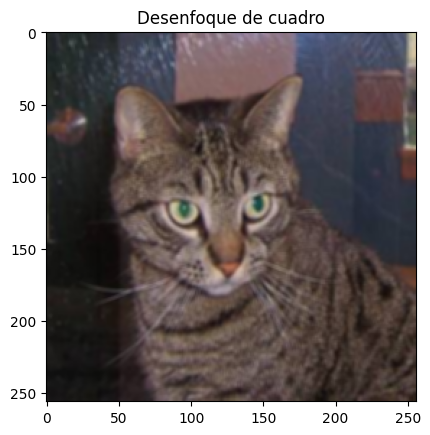

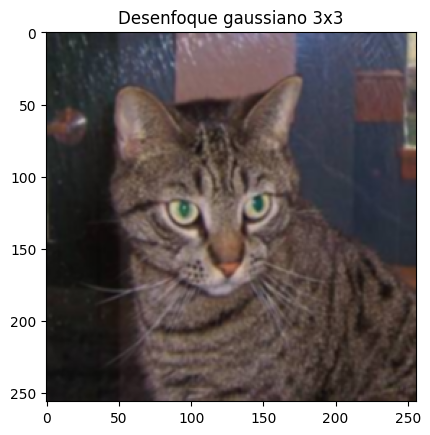

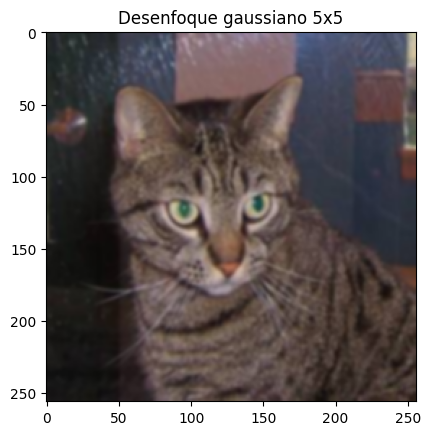

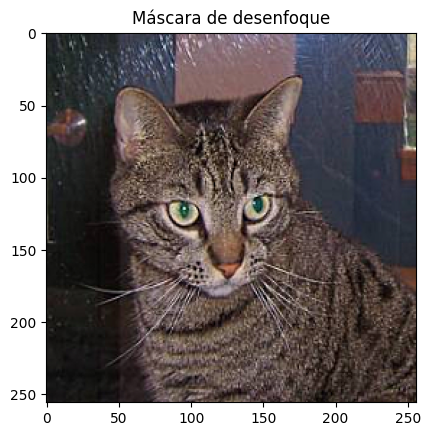

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Descargar la imagen del gato desde el repositorio de GitHub
url = 'https://github.com/davidlealo/sic_ai_2024/raw/main/007_depp_learning/chapter_8/cat_dog_images/cat-01.jpg'
urllib.request.urlretrieve(url, 'cat-01.jpg')

# Cargar la imagen
image = cv2.imread('cat-01.jpg')

# Redimensionar la imagen a un tamaño más pequeño (p. ej., 256x256)
image_resized = cv2.resize(image, (256, 256))

# Mostrar la imagen original redimensionada
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Imagen redimensionada")
plt.show()

# Función para aplicar un filtro y mostrar la imagen resultante
def aplicar_filtro_color(kernel, nombre):
    # Aplicar el filtro a cada canal de la imagen en color
    channels = cv2.split(image_resized)
    filtered_channels = [cv2.filter2D(ch, -1, kernel) for ch in channels]
    output = cv2.merge(filtered_channels)

    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title(nombre)
    plt.show()

# Núcleo de identidad
kernel_identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
aplicar_filtro_color(kernel_identity, "Identidad")

# Núcleo de detección de bordes
kernel_edges = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
aplicar_filtro_color(kernel_edges, "Detección de bordes")

# Núcleo de enfoque
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
aplicar_filtro_color(kernel_sharpen, "Enfocar")

# Núcleo de desenfoque
kernel_blur = np.ones((3, 3), np.float32) / 9
aplicar_filtro_color(kernel_blur, "Desenfoque de cuadro")

# Núcleo de desenfoque gaussiano 3x3
kernel_gaussian_3x3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
aplicar_filtro_color(kernel_gaussian_3x3, "Desenfoque gaussiano 3x3")

# Núcleo de desenfoque gaussiano 5x5
kernel_gaussian_5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) / 256
aplicar_filtro_color(kernel_gaussian_5x5, "Desenfoque gaussiano 5x5")

# Núcleo de máscara de desenfoque
kernel_unsharp = -1/256 * np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])
aplicar_filtro_color(kernel_unsharp, "Máscara de desenfoque")


# Ejercicio 0701

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
!pip install tensorflow==2.14.0 tensorflow-estimator==2.14.0 # Cambiamos a 2.14.0 para poder usar tf.estimator
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
# Cargar el dataset MNIST
import tensorflow_datasets as tfds

In [ ]:
# Set hyperparameters: BUFFER_SIZE to shuffle data, BATCH_SIZE that is mini-batch size, and the number of training epochs
import numpy as np
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [ ]:
# Define the number of times to repeat per epoch
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

In [ ]:
# Define a function that preprocesses the input image and label.
def preprocess(item):
    image = item['image']
    label = item['label']
    image = tf.image.convert_image_dtype(image, tf.float32) # Convert to a tf.float32 type as it was originally a 'unit8' type with a range of [0, 255]
    return {'image-pixels' : image}, label[... , tf.newaxis]

In [ ]:
# Define two input functions for training and evaluation.
def train_input_fn():
    datasets = tfds.load(name='mnist', )
    mnist_train = datasets['train']

    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

In [ ]:
def eval_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset

In [ ]:
# Define a feature column.
image_feature_column = tf.feature_column.numeric_column(key='image-pixels', shape=(28*28)) # Make it as a feature column of 784

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
# After defining an estimator object
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32, 16],
    n_classes=10)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
# Training, evaluation, prediction
dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)

eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')

print(eval_result)

Instructions for updating:
Use tf.keras instead.


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


{'accuracy': 0.8834, 'average_loss': 0.4431918, 'loss': 0.443687, 'global_step': 18760}


In [ ]:
NUM_EPOCHS = 50

In [ ]:
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

In [ ]:
image_feature_column = tf.feature_column.numeric_column(key='image-pixels', shape=(28*28)) # Make it as a feature column of 784

In [ ]:
# After defining an estimator object
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32, 16],
    n_classes=10)

In [ ]:
# Training, evaluation, prediction
dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)

eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')
print('==============================================')

print(eval_result)

{'accuracy': 0.9173, 'average_loss': 0.296145, 'loss': 0.29578668, 'global_step': 46900}


##Coding Exercise #0702

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170498071/170498071 [==============================] - 3s 0us/step


####Take a look at the dataset:

In [ ]:
# Images already reshaped as 32x32.
# 3 Color channels.
# y is not one-hot-encoded yet.
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("\n")
print("Testing data X shape: {}".format(X_test.shape))
print("Testing data y shape: {}".format(y_test.shape))

Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)


Testing data X shape: (10000, 32, 32, 3)
Testing data y shape: (10000, 1)


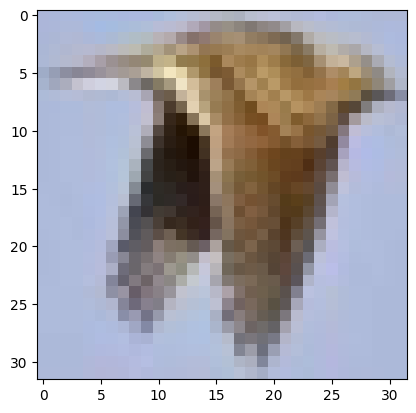

In [ ]:
i_image= 123                                                        # Image index. You can change it at will.
a_single_image= X_train[i_image,:,:,:]
plt.imshow(a_single_image)                                          #  Display as a color image.
plt.show()

In [ ]:
# Check for the minimum and maximum pixel value.
print("MIN : {}".format(a_single_image.min()))
print("MAX : {}".format(a_single_image.max()))

MIN : 1
MAX : 243


####Preprocesamiento

In [ ]:
# Scaling.
X_train = X_train/255
X_test = X_test/255

####Define the hyperparameters and placeholders

In [ ]:
batch_size = 8
n_epochs  = 20
learn_rate = 0.0001

####Define the deep learning model (CNN)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

# 1st Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(7, 7),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation=None))
# 1st Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

In [ ]:
# 2nd Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))                      # Apply the ReLu activation function.
# 2nd Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'))

In [ ]:
# Flattened full layer
model.add(tf.keras.layers.Flatten())
# fully connected layer
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

In [ ]:
# Dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))

In [ ]:
# Output layer
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

####Define the loss function and the optimizer

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        4736      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              4195328   
                                                                 
 dropout (Dropout)           (None, 1024)              0

####Training and Testing

In [ ]:
history = model.fit(X_train, y_train, epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Epoch 1/20
6250/6250 [==============================] - 466s 74ms/step - loss: 1.4787 - accuracy: 0.4718 - val_loss: 1.1715 - val_accuracy: 0.5900
Epoch 2/20
6250/6250 [==============================] - 462s 74ms/step - loss: 1.1269 - accuracy: 0.6061 - val_loss: 1.0414 - val_accuracy: 0.6425
Epoch 3/20
6250/6250 [==============================] - 468s 75ms/step - loss: 0.9752 - accuracy: 0.6610 - val_loss: 0.9778 - val_accuracy: 0.6512
Epoch 4/20
6250/6250 [==============================] - 464s 74ms/step - loss: 0.8743 - accuracy: 0.6964 - val_loss: 0.8840 - val_accuracy: 0.6961
Epoch 5/20
6250/6250 [==============================] - 464s 74ms/step - loss: 0.7883 - accuracy: 0.7250 - val_loss: 0.8964 - val_accuracy: 0.6899
Epoch 6/20
6250/6250 [==============================] - 456s 73ms/step - loss: 0.7021 - accuracy: 0.7569 - val_loss: 0.8375 - val_accuracy: 0.7134
Epoch 7/20
6250/6250 [==============================] - 456s 73ms/step - loss: 0.6280 - accuracy: 0.7832 - val_loss: 0